In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
import os
import pickle
import sys
from pathlib import Path

import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots
from collections import defaultdict
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)

matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots

from tueplots import bundles, fontsizes, figsizes


from wbml import plot

### Locations

In [5]:
img_folder = 'tmp'

In [2]:
########### READ LOG FILES ###########

main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
res = "saved_results/07-29-10.46.30_seq-pvi-bank-4c-10g-1000l-nealprior-splitb-128b-0-0005lr-2s-100m-debug"
res_dir = os.path.join(main_dir, res)

Merge dataframes for plotting purposes.

In [17]:
clients = []
servers = []
metrics_dir = os.path.join(res_dir, "metrics")
for log_name in os.listdir(metrics_dir):
    log = pd.read_csv(os.path.join(metrics_dir, log_name))
    if log_name.__contains__('server'):
        servers.append(log)
    else:
        clients.append(log)

In [19]:
server = pd.concat(servers, ignore_index=True)
client = pd.concat(clients, ignore_index=True)

# Plotting

test mll

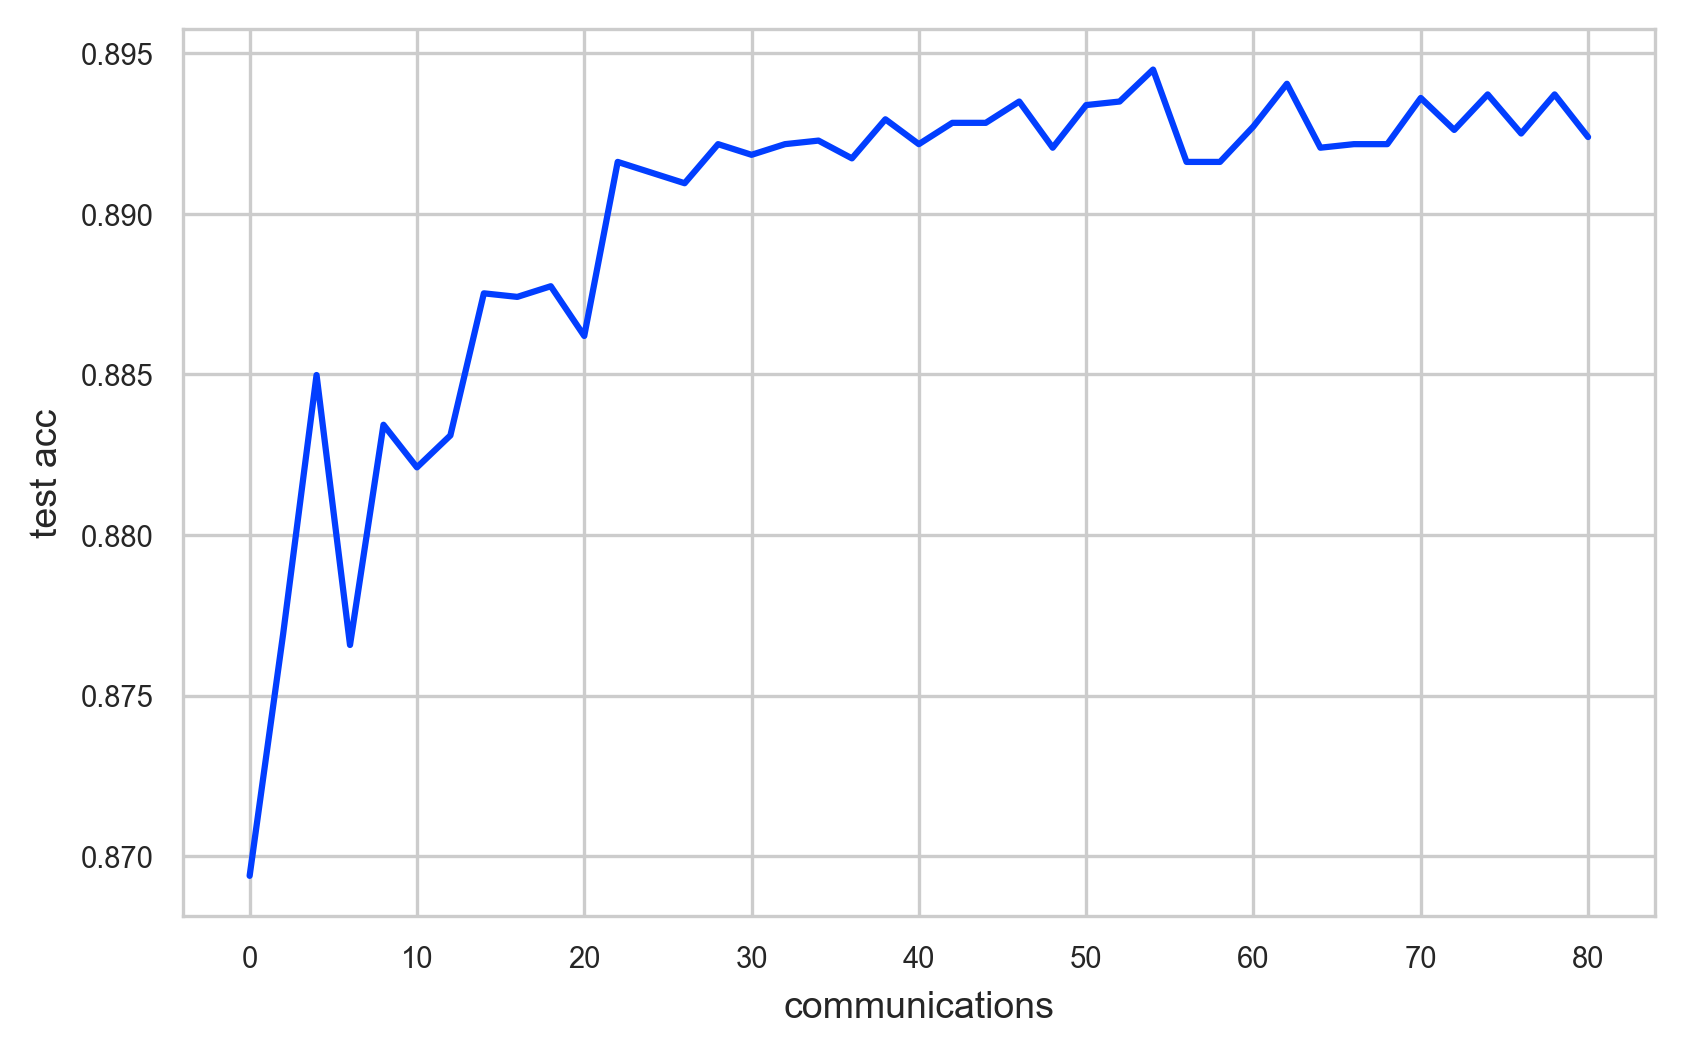

In [28]:
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)

    x_metric = 'communications'
    # y_metric = 'test_mll'
    y_metric = 'test_acc'


    data = server

    sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax)
    
    # ax.set_ylim(-0.4, -0.3)

    ax.set_ylabel(' '.join(y_metric.split('_')))
    ax.set_xlabel(' '.join(x_metric.split('_')))

    plt.show()

Accuracy